##### 샘플 데이터

In [1]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
with open('5조사마 실습.pkl', 'rb') as file:
    df=pickle.load(file)


In [3]:
df.reset_index(drop=True, inplace=True)


In [4]:
df

,time,review,tagged_review,vector,cluster,action_cluster
0,2023. 2. 23. 16:05,리추얼 라이프 건강 관리 리추얼 라이프 세대 사이에서 유행하는 하나의 트렌드로 에...,"[리추얼, 라이프, 건강, 관리, 리추얼, 라이프, 세대, 사이, 유행, 트렌드, ...","[0.042075433, 0.08500513, 0.025808953, -0.1799...",0,2
1,2021. 11. 10. 14:00,야외헬스장에서의 운동 야외헬스장에서의 운동 제주에 와서 야외헬스장을 깨알같이 이...,"[야외, 헬스장, 운동, 야외, 헬스장, 운동, 제주, 오다, 야외, 헬스장, 깨알...","[0.08101353, -0.07158841, 0.04005801, -0.03166...",0,1
2,2021. 11. 11. 0:23,나의 운동 최근 추워지고 나서 움직임이 줄었다늘 만보씩 채워지던 운동들이 뜸하다...,"[운동, 최근, 추워지다, 나서다, 움직임, 줄다, 늘, 보, 채우다, 운동, 뜸,...","[0.04815986, -0.059750825, 0.11209553, -0.1474...",0,5
3,2022. 11. 13. 13:49,나생각 건강한 마음을 위해 하는 일 걷기 운동하기 걷기는 특별한 준비 없이 바로 실...,"[생각, 건강하다, 마음, 위해, 걷기, 운동, 걷기, 특별하다, 준비, 실행, 옮...","[0.0067759384, 0.007201063, 0.083529234, -0.21...",0,1
4,2021. 11. 10. 15:51,운동 코로나를 이기지못하고 사라진룩스필라테스 군자점 오랜만에 포스팅을 올립니다한번 ...,"[운동, 코로나, 이기, 못, 사라지다, 룩스, 필라테스, 군자, 점, 만, 포스팅...","[0.08892511, -0.16475467, 0.1420234, -0.185881...",0,4
...,...,...,...,...,...,...
761,2022. 4. 7. 12:34,보건의 날 내 몸을 위한 나만의 건강관리법 도미노피자 방문할인 건강한 모두의 행복...,"[보건, 날, 내, 몸, 위, 건강, 관리, 법, 도미노피자, 방문, 할인, 건강하...","[-0.18791929, 0.20041965, 0.11164308, -0.34738...",4,5
762,2023. 2. 23. 23:26,나의 규칙적인 건강 관리 리추얼 인도의 건강은 늘 신경써서 관리해야 하는 것이고앞으...,"[규칙, 건강, 관리, 리추얼, 인도, 건강, 늘, 신경, 써다, 관리, 앞, 모르...","[-0.11123375, 0.32838488, 0.061738122, -0.3957...",4,4
763,2023. 2. 23. 23:24,답변 건강 관리 지민님댄스 따라하기정국님스파링과님운동일지 과 세대 사이에서 유행하는...,"[답변, 건강, 관리, 지민, 댄스, 따르다, 정국, 스파링, 운동, 일지, 세대,...","[-0.0942605, 0.13071838, 0.034473896, -0.10340...",4,5
764,2023. 2. 23. 21:59,랜덤 답변 건강 관리 수면충분한 수면을 취하십시오 규칙적인 수면 패턴을 유지하고 ...,"[랜덤, 답변, 건강, 관리, 수면, 충분하다, 수면, 취하, 시오, 규칙, 수면,...","[0.050351117, 0.73038745, -0.090554796, -0.877...",4,1


# ◆ 1. Satisfaction
* 1.1 감성사전 불러오기 (SentiWord_info.json)
* 1.2 감성점수 구하는 define 함수 만들기
* 1.3 감성점수 구하기
* 1.4 액션 별로 감성점수 계산해서 df에 추가하기

### 1.1 감성사전 불러오기

In [5]:
import json

In [6]:
with open('SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
    sent_dicts=json.load(f)

In [7]:
sent_dicts

[{'word': '(-;', 'word_root': '(', 'polarity': '1'},
 {'word': '(;_;)', 'word_root': '(;_;)', 'polarity': '-1'},
 {'word': '(^^)', 'word_root': '(^^)', 'polarity': '1'},
 {'word': '(^-^)', 'word_root': '(^-^)', 'polarity': '1'},
 {'word': '(^^*', 'word_root': '(', 'polarity': '1'},
 {'word': '(^_^)', 'word_root': '(^_^)', 'polarity': '1'},
 {'word': '(^_^;', 'word_root': '(', 'polarity': '-1'},
 {'word': '(^o^)', 'word_root': '(^o^)', 'polarity': '1'},
 {'word': '(-_-)', 'word_root': '(-_-)', 'polarity': '-1'},
 {'word': '(T_T)', 'word_root': '(T_T)', 'polarity': '-1'},
 {'word': '(ㅡㅡ)', 'word_root': '(', 'polarity': '-1'},
 {'word': ')-:', 'word_root': ')', 'polarity': '-1'},
 {'word': '*^^*', 'word_root': '*', 'polarity': '1'},
 {'word': '/^o^\\', 'word_root': '/', 'polarity': '1'},
 {'word': ':(', 'word_root': ':', 'polarity': '1'},
 {'word': ":'-(", 'word_root': ':', 'polarity': '1'},
 {'word': ':-(', 'word_root': ':', 'polarity': '1'},
 {'word': ':)', 'word_root': ':', 'polarity':

### 1.2 감성점수 구하는 define 함수 만들기

In [8]:
def sentiment_score(sent_dicts, token_list):
    result_list=[]

    for token in token_list:
        for dict in sent_dicts:
            if token == dict['word']:
                result=dict['polarity'], dict['word']
                result_list.append(result)

    return(result_list)

In [9]:
sentiment_score(sent_dicts, df.tagged_review.iloc[0])

[('1', '확실하다'),
 ('-2', '해'),
 ('-1', '늘어나다'),
 ('-1', '틀리다'),
 ('-1', '짧다'),
 ('-2', '어렵다'),
 ('-2', '해'),
 ('2', '귀하다'),
 ('-1', '없다'),
 ('2', '최고'),
 ('1', '적당하다'),
 ('2', '좋다'),
 ('-1', '없다'),
 ('1', '끌다'),
 ('-1', '놀리다'),
 ('-2', '힘들다'),
 ('1', '놀다'),
 ('-1', '없다'),
 ('2', '즐겁다'),
 ('-2', '아니다'),
 ('2', '좋다'),
 ('2', '많다'),
 ('-1', '떨어지다'),
 ('1', '도움'),
 ('-2', '아니다'),
 ('-2', '나쁘다'),
 ('-2', '힘들다'),
 ('-2', '어렵다')]

### 1.3  감성점수 구하기

#### 1.3.1 적합하게 형태소 재분리

In [10]:
from konlpy.tag import Okt
okt=Okt()

#### 1.3.2 감정점수 적용하기

In [11]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)
    tagged_list=[]
    for word, tag in pos_words:
        if tag in ['Noun', 'Adjective', 'Verb','VerbPrefix']:
                tagged_list.append(word)
    return tagged_list

In [12]:
sentiment=[]
for i in tqdm(df['review']):
    token = okt_pos_tagging(i)
    score = sentiment_score(sent_dicts, token)
    sentiment.append(score)

100%|████████████████████████████████████████████████████████████████████████████████| 766/766 [01:10<00:00, 10.92it/s]


In [13]:
sentiment[0]

[('1', '확실하다'),
 ('-2', '해'),
 ('-1', '늘어나다'),
 ('-1', '틀리다'),
 ('-1', '짧다'),
 ('-2', '어렵다'),
 ('-2', '해'),
 ('0', '못'),
 ('2', '귀하다'),
 ('-1', '없다'),
 ('2', '최고'),
 ('1', '적당하다'),
 ('2', '좋다'),
 ('-1', '없다'),
 ('1', '끌다'),
 ('-1', '놀리다'),
 ('-2', '힘들다'),
 ('1', '놀다'),
 ('-1', '없다'),
 ('2', '즐겁다'),
 ('-2', '아니다'),
 ('2', '좋다'),
 ('2', '많다'),
 ('-1', '떨어지다'),
 ('1', '도움'),
 ('-2', '아니다'),
 ('-2', '나쁘다'),
 ('-2', '힘들다'),
 ('-2', '어렵다')]

In [14]:
# 감정점수 평균 구하기
sentiment_score=[]
for sent in tqdm(sentiment):
    score=[]
    for s in sent:
        score.append(int(s[0]))

    if len(score)==0:
        sentiment_score.append(0)
    else:
        sentiment_score.append(np.mean(score))

100%|████████████████████████████████████████████████████████████████████████████| 766/766 [00:00<00:00, 100329.04it/s]


In [15]:
df['sentiment_score']=sentiment_score
df.head()

,time,review,tagged_review,vector,cluster,action_cluster,sentiment_score
0,2023. 2. 23. 16:05,리추얼 라이프 건강 관리 리추얼 라이프 세대 사이에서 유행하는 하나의 트렌드로 에...,"[리추얼, 라이프, 건강, 관리, 리추얼, 라이프, 세대, 사이, 유행, 트렌드, ...","[0.042075433, 0.08500513, 0.025808953, -0.1799...",0,2,-0.310345
1,2021. 11. 10. 14:00,야외헬스장에서의 운동 야외헬스장에서의 운동 제주에 와서 야외헬스장을 깨알같이 이...,"[야외, 헬스장, 운동, 야외, 헬스장, 운동, 제주, 오다, 야외, 헬스장, 깨알...","[0.08101353, -0.07158841, 0.04005801, -0.03166...",0,1,-0.400000
2,2021. 11. 11. 0:23,나의 운동 최근 추워지고 나서 움직임이 줄었다늘 만보씩 채워지던 운동들이 뜸하다...,"[운동, 최근, 추워지다, 나서다, 움직임, 줄다, 늘, 보, 채우다, 운동, 뜸,...","[0.04815986, -0.059750825, 0.11209553, -0.1474...",0,5,0.600000
3,2022. 11. 13. 13:49,나생각 건강한 마음을 위해 하는 일 걷기 운동하기 걷기는 특별한 준비 없이 바로 실...,"[생각, 건강하다, 마음, 위해, 걷기, 운동, 걷기, 특별하다, 준비, 실행, 옮...","[0.0067759384, 0.007201063, 0.083529234, -0.21...",0,1,-0.093750
4,2021. 11. 10. 15:51,운동 코로나를 이기지못하고 사라진룩스필라테스 군자점 오랜만에 포스팅을 올립니다한번 ...,"[운동, 코로나, 이기, 못, 사라지다, 룩스, 필라테스, 군자, 점, 만, 포스팅...","[0.08892511, -0.16475467, 0.1420234, -0.185881...",0,4,0.300000


### 1.4 전체 액터와 액션에 대해서 감성점수 계산


#### 1.4.1 dict 형식으로 출력


In [16]:
df.cluster.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [17]:
df

,time,review,tagged_review,vector,cluster,action_cluster,sentiment_score
0,2023. 2. 23. 16:05,리추얼 라이프 건강 관리 리추얼 라이프 세대 사이에서 유행하는 하나의 트렌드로 에...,"[리추얼, 라이프, 건강, 관리, 리추얼, 라이프, 세대, 사이, 유행, 트렌드, ...","[0.042075433, 0.08500513, 0.025808953, -0.1799...",0,2,-0.310345
1,2021. 11. 10. 14:00,야외헬스장에서의 운동 야외헬스장에서의 운동 제주에 와서 야외헬스장을 깨알같이 이...,"[야외, 헬스장, 운동, 야외, 헬스장, 운동, 제주, 오다, 야외, 헬스장, 깨알...","[0.08101353, -0.07158841, 0.04005801, -0.03166...",0,1,-0.400000
2,2021. 11. 11. 0:23,나의 운동 최근 추워지고 나서 움직임이 줄었다늘 만보씩 채워지던 운동들이 뜸하다...,"[운동, 최근, 추워지다, 나서다, 움직임, 줄다, 늘, 보, 채우다, 운동, 뜸,...","[0.04815986, -0.059750825, 0.11209553, -0.1474...",0,5,0.600000
3,2022. 11. 13. 13:49,나생각 건강한 마음을 위해 하는 일 걷기 운동하기 걷기는 특별한 준비 없이 바로 실...,"[생각, 건강하다, 마음, 위해, 걷기, 운동, 걷기, 특별하다, 준비, 실행, 옮...","[0.0067759384, 0.007201063, 0.083529234, -0.21...",0,1,-0.093750
4,2021. 11. 10. 15:51,운동 코로나를 이기지못하고 사라진룩스필라테스 군자점 오랜만에 포스팅을 올립니다한번 ...,"[운동, 코로나, 이기, 못, 사라지다, 룩스, 필라테스, 군자, 점, 만, 포스팅...","[0.08892511, -0.16475467, 0.1420234, -0.185881...",0,4,0.300000
...,...,...,...,...,...,...,...
761,2022. 4. 7. 12:34,보건의 날 내 몸을 위한 나만의 건강관리법 도미노피자 방문할인 건강한 모두의 행복...,"[보건, 날, 내, 몸, 위, 건강, 관리, 법, 도미노피자, 방문, 할인, 건강하...","[-0.18791929, 0.20041965, 0.11164308, -0.34738...",4,5,0.769231
762,2023. 2. 23. 23:26,나의 규칙적인 건강 관리 리추얼 인도의 건강은 늘 신경써서 관리해야 하는 것이고앞으...,"[규칙, 건강, 관리, 리추얼, 인도, 건강, 늘, 신경, 써다, 관리, 앞, 모르...","[-0.11123375, 0.32838488, 0.061738122, -0.3957...",4,4,0.271186
763,2023. 2. 23. 23:24,답변 건강 관리 지민님댄스 따라하기정국님스파링과님운동일지 과 세대 사이에서 유행하는...,"[답변, 건강, 관리, 지민, 댄스, 따르다, 정국, 스파링, 운동, 일지, 세대,...","[-0.0942605, 0.13071838, 0.034473896, -0.10340...",4,5,1.481481
764,2023. 2. 23. 21:59,랜덤 답변 건강 관리 수면충분한 수면을 취하십시오 규칙적인 수면 패턴을 유지하고 ...,"[랜덤, 답변, 건강, 관리, 수면, 충분하다, 수면, 취하, 시오, 규칙, 수면,...","[0.050351117, 0.73038745, -0.090554796, -0.877...",4,1,1.138889


In [18]:
action_sents=dict()
for actor in df.cluster.unique():
    actor_df=df[df['cluster']==actor]

    for i in actor_df.action_cluster.unique():
        action_score=actor_df[actor_df['action_cluster']==i].sentiment_score
        action_score=np.mean(action_score)
        action_sents['Actor{}_Action{}'.format(actor, i)] = action_score

In [23]:
action_sents

{'Actor0_Action2': 0.1948270449786715,
 'Actor0_Action1': 0.07914039641762848,
 'Actor0_Action5': 0.3323689846187704,
 'Actor0_Action4': 0.202581858429613,
 'Actor0_Action3': 0.38425766114080323,
 'Actor1_Action4': 0.3566344587722286,
 'Actor1_Action2': 0.40726747370724564,
 'Actor1_Action1': 0.15362805253291945,
 'Actor1_Action3': 0.4179256576547598,
 'Actor2_Action3': 0.37664534079672873,
 'Actor2_Action5': 0.35302147587949295,
 'Actor2_Action1': 0.39866690935769883,
 'Actor2_Action2': 0.6166666666666667,
 'Actor2_Action4': 0.6819691551834409,
 'Actor3_Action4': -0.2257514353259034,
 'Actor3_Action1': 0.18816078287909277,
 'Actor3_Action2': 0.14340277777777777,
 'Actor3_Action5': 0.3983485650152317,
 'Actor3_Action3': -0.05389044506691564,
 'Actor4_Action1': 0.5133693458798997,
 'Actor4_Action3': 0.20305187210450368,
 'Actor4_Action5': 0.5503638445158914,
 'Actor4_Action2': 0.4159550794706094,
 'Actor4_Action4': 0.4372867348310351}

In [22]:
df

,time,review,tagged_review,vector,cluster,action_cluster,sentiment_score
0,2023. 2. 23. 16:05,리추얼 라이프 건강 관리 리추얼 라이프 세대 사이에서 유행하는 하나의 트렌드로 에...,"[리추얼, 라이프, 건강, 관리, 리추얼, 라이프, 세대, 사이, 유행, 트렌드, ...","[0.042075433, 0.08500513, 0.025808953, -0.1799...",0,2,-0.310345
1,2021. 11. 10. 14:00,야외헬스장에서의 운동 야외헬스장에서의 운동 제주에 와서 야외헬스장을 깨알같이 이...,"[야외, 헬스장, 운동, 야외, 헬스장, 운동, 제주, 오다, 야외, 헬스장, 깨알...","[0.08101353, -0.07158841, 0.04005801, -0.03166...",0,1,-0.400000
2,2021. 11. 11. 0:23,나의 운동 최근 추워지고 나서 움직임이 줄었다늘 만보씩 채워지던 운동들이 뜸하다...,"[운동, 최근, 추워지다, 나서다, 움직임, 줄다, 늘, 보, 채우다, 운동, 뜸,...","[0.04815986, -0.059750825, 0.11209553, -0.1474...",0,5,0.600000
3,2022. 11. 13. 13:49,나생각 건강한 마음을 위해 하는 일 걷기 운동하기 걷기는 특별한 준비 없이 바로 실...,"[생각, 건강하다, 마음, 위해, 걷기, 운동, 걷기, 특별하다, 준비, 실행, 옮...","[0.0067759384, 0.007201063, 0.083529234, -0.21...",0,1,-0.093750
4,2021. 11. 10. 15:51,운동 코로나를 이기지못하고 사라진룩스필라테스 군자점 오랜만에 포스팅을 올립니다한번 ...,"[운동, 코로나, 이기, 못, 사라지다, 룩스, 필라테스, 군자, 점, 만, 포스팅...","[0.08892511, -0.16475467, 0.1420234, -0.185881...",0,4,0.300000
...,...,...,...,...,...,...,...
761,2022. 4. 7. 12:34,보건의 날 내 몸을 위한 나만의 건강관리법 도미노피자 방문할인 건강한 모두의 행복...,"[보건, 날, 내, 몸, 위, 건강, 관리, 법, 도미노피자, 방문, 할인, 건강하...","[-0.18791929, 0.20041965, 0.11164308, -0.34738...",4,5,0.769231
762,2023. 2. 23. 23:26,나의 규칙적인 건강 관리 리추얼 인도의 건강은 늘 신경써서 관리해야 하는 것이고앞으...,"[규칙, 건강, 관리, 리추얼, 인도, 건강, 늘, 신경, 써다, 관리, 앞, 모르...","[-0.11123375, 0.32838488, 0.061738122, -0.3957...",4,4,0.271186
763,2023. 2. 23. 23:24,답변 건강 관리 지민님댄스 따라하기정국님스파링과님운동일지 과 세대 사이에서 유행하는...,"[답변, 건강, 관리, 지민, 댄스, 따르다, 정국, 스파링, 운동, 일지, 세대,...","[-0.0942605, 0.13071838, 0.034473896, -0.10340...",4,5,1.481481
764,2023. 2. 23. 21:59,랜덤 답변 건강 관리 수면충분한 수면을 취하십시오 규칙적인 수면 패턴을 유지하고 ...,"[랜덤, 답변, 건강, 관리, 수면, 충분하다, 수면, 취하, 시오, 규칙, 수면,...","[0.050351117, 0.73038745, -0.090554796, -0.877...",4,1,1.138889


#### 1.4.2 정규화 (-10~10)
* minmaxscaler를 이용해서 정규화 : 주어진 데이터를 특정 범위로 변환(정규화)하는 데 사용
* minmaxscaler은 배열(array 데이터 형식, shape이 1이어야 작동)로 변환필요 

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
data = action_sents.values()
data=np.array(list(data)).reshape(-1,1) # reshape을 통해서 MinMaxScaler읽을수 있는 형태로 변환. -1 : 자동으로 계산해주고, 1 : 1차원으로 변
data

array([[ 0.19482704],
       [ 0.0791404 ],
       [ 0.33236898],
       [ 0.20258186],
       [ 0.38425766],
       [ 0.35663446],
       [ 0.40726747],
       [ 0.15362805],
       [ 0.41792566],
       [ 0.37664534],
       [ 0.35302148],
       [ 0.39866691],
       [ 0.61666667],
       [ 0.68196916],
       [-0.22575144],
       [ 0.18816078],
       [ 0.14340278],
       [ 0.39834857],
       [-0.05389045],
       [ 0.51336935],
       [ 0.20305187],
       [ 0.55036384],
       [ 0.41595508],
       [ 0.43728673]])

In [25]:
scaler = MinMaxScaler(feature_range=(-10,10)) # feature_range 몇부터 몇까지 정규화할지
transposed_data=scaler.fit_transform(data)
transposed_data

array([[ -0.73330528],
       [ -3.2822537 ],
       [  2.29718541],
       [ -0.56244183],
       [  3.4404596 ],
       [  2.83183174],
       [  3.94743968],
       [ -1.6410514 ],
       [  4.1822737 ],
       [  3.27273574],
       [  2.75222612],
       [  3.75794162],
       [  8.56117644],
       [ 10.        ],
       [-10.        ],
       [ -0.88018444],
       [ -1.86634705],
       [  3.75092747],
       [ -6.21335041],
       [  6.2852047 ],
       [ -0.55208592],
       [  7.10031232],
       [  4.13885554],
       [  4.60886042]])

In [26]:
score_result=transposed_data.flatten() # 다차원 리스트를 풀어주는 함수(for문 귀찮을떄~) 
score_result

array([ -0.73330528,  -3.2822537 ,   2.29718541,  -0.56244183,
         3.4404596 ,   2.83183174,   3.94743968,  -1.6410514 ,
         4.1822737 ,   3.27273574,   2.75222612,   3.75794162,
         8.56117644,  10.        , -10.        ,  -0.88018444,
        -1.86634705,   3.75092747,  -6.21335041,   6.2852047 ,
        -0.55208592,   7.10031232,   4.13885554,   4.60886042])

In [31]:
score_result=score_result.tolist() #를 ! 리스트화
score_result

[-0.733305276933776,
 -3.2822537038087995,
 2.2971854066128143,
 -0.5624418299210765,
 3.4404596049631415,
 2.831831737370658,
 3.9474396780609897,
 -1.6410514022614895,
 4.18227370207566,
 3.272735738750015,
 2.7522261201683795,
 3.7579416223934228,
 8.56117644130709,
 10.0,
 -10.0,
 -0.8801844414978,
 -1.8663470463628098,
 3.7509274740796013,
 -6.2133504063722444,
 6.2852046969886235,
 -0.552085919086732,
 7.100312319814128,
 4.1388555356320715,
 4.608860415623964]

In [32]:
for key, new_value in zip(action_sents.keys(), score_result): #zip은 for문에 두개 한번에 돌리는거
    action_sents[key]=new_value

In [33]:
action_sents

{'Actor0_Action2': -0.733305276933776,
 'Actor0_Action1': -3.2822537038087995,
 'Actor0_Action5': 2.2971854066128143,
 'Actor0_Action4': -0.5624418299210765,
 'Actor0_Action3': 3.4404596049631415,
 'Actor1_Action4': 2.831831737370658,
 'Actor1_Action2': 3.9474396780609897,
 'Actor1_Action1': -1.6410514022614895,
 'Actor1_Action3': 4.18227370207566,
 'Actor2_Action3': 3.272735738750015,
 'Actor2_Action5': 2.7522261201683795,
 'Actor2_Action1': 3.7579416223934228,
 'Actor2_Action2': 8.56117644130709,
 'Actor2_Action4': 10.0,
 'Actor3_Action4': -10.0,
 'Actor3_Action1': -0.8801844414978,
 'Actor3_Action2': -1.8663470463628098,
 'Actor3_Action5': 3.7509274740796013,
 'Actor3_Action3': -6.2133504063722444,
 'Actor4_Action1': 6.2852046969886235,
 'Actor4_Action3': -0.552085919086732,
 'Actor4_Action5': 7.100312319814128,
 'Actor4_Action2': 4.1388555356320715,
 'Actor4_Action4': 4.608860415623964}

# ◆ 2. Importance
* 2.1 importance 점수 구하기 _ 전체 토픽의 비중
* 2.2 importance 점수 정규화

### 2-1. Importance 점수 구하기

In [20]:
from collections import Counter

In [34]:
#action 개수
importance_check=[]
for actor, action in zip(df['cluster'],df['action_cluster']):
    importance_check.append('Actor'+str(actor)+'_'+'Action'+str(action))

In [35]:
frequency=Counter(importance_check)
frequency

Counter({'Actor1_Action1': 94,
         'Actor1_Action3': 74,
         'Actor1_Action2': 72,
         'Actor3_Action1': 71,
         'Actor1_Action4': 49,
         'Actor3_Action4': 47,
         'Actor3_Action5': 45,
         'Actor3_Action3': 45,
         'Actor0_Action1': 44,
         'Actor3_Action2': 40,
         'Actor0_Action2': 28,
         'Actor0_Action3': 25,
         'Actor0_Action5': 19,
         'Actor2_Action5': 18,
         'Actor0_Action4': 16,
         'Actor2_Action1': 14,
         'Actor4_Action1': 13,
         'Actor4_Action2': 11,
         'Actor4_Action3': 10,
         'Actor4_Action5': 9,
         'Actor4_Action4': 8,
         'Actor2_Action4': 7,
         'Actor2_Action3': 6,
         'Actor2_Action2': 1})

In [37]:
# 중요도 사전 만들기
importance_dict=dict()

# 전체 합
total_count=sum(frequency.values())

# 빈도수/전체값*100
for item, value in frequency.items():
    importance=(value/total_count)*100
    importance_dict[item]=importance

### 2-2. Importance 점수 정규화(0~10)

In [38]:
data=importance_dict.values()

# array형태로 변환
data=np.array(list(data)).reshape(-1,1)

In [39]:
scaler=MinMaxScaler(feature_range=(0,10))
transformed_data=scaler.fit_transform(data)
transformed_data

array([[ 2.90322581],
       [ 4.62365591],
       [ 1.93548387],
       [ 1.61290323],
       [ 2.58064516],
       [ 5.16129032],
       [ 7.6344086 ],
       [10.        ],
       [ 7.84946237],
       [ 0.53763441],
       [ 1.82795699],
       [ 1.39784946],
       [ 0.        ],
       [ 0.64516129],
       [ 4.94623656],
       [ 7.52688172],
       [ 4.19354839],
       [ 4.7311828 ],
       [ 4.7311828 ],
       [ 1.29032258],
       [ 0.96774194],
       [ 0.86021505],
       [ 1.07526882],
       [ 0.75268817]])

In [40]:
score_result=transformed_data.flatten().tolist()
score_result=[round(i,4) for i in score_result]
score_result

[2.9032,
 4.6237,
 1.9355,
 1.6129,
 2.5806,
 5.1613,
 7.6344,
 10.0,
 7.8495,
 0.5376,
 1.828,
 1.3978,
 0.0,
 0.6452,
 4.9462,
 7.5269,
 4.1935,
 4.7312,
 4.7312,
 1.2903,
 0.9677,
 0.8602,
 1.0753,
 0.7527]

In [41]:
# value 값 교체
for key, new_value in zip(importance_dict.keys(), score_result):
    importance_dict[key]=new_value

In [42]:
importance_dict

{'Actor0_Action2': 2.9032,
 'Actor0_Action1': 4.6237,
 'Actor0_Action5': 1.9355,
 'Actor0_Action4': 1.6129,
 'Actor0_Action3': 2.5806,
 'Actor1_Action4': 5.1613,
 'Actor1_Action2': 7.6344,
 'Actor1_Action1': 10.0,
 'Actor1_Action3': 7.8495,
 'Actor2_Action3': 0.5376,
 'Actor2_Action5': 1.828,
 'Actor2_Action1': 1.3978,
 'Actor2_Action2': 0.0,
 'Actor2_Action4': 0.6452,
 'Actor3_Action4': 4.9462,
 'Actor3_Action1': 7.5269,
 'Actor3_Action2': 4.1935,
 'Actor3_Action5': 4.7312,
 'Actor3_Action3': 4.7312,
 'Actor4_Action1': 1.2903,
 'Actor4_Action3': 0.9677,
 'Actor4_Action5': 0.8602,
 'Actor4_Action2': 1.0753,
 'Actor4_Action4': 0.7527}

# ◆ 3. Opportunity
* 3.1 Opportunity score
* 3.2 Opportunity area

### 3.1 Opportunity score
Opportunity = Importance + Max(Importance-Satisfaction, 0)

In [43]:
def opportunity_score(satisfaction, importance):
    result=importance + max(importance-satisfaction,0)
    return result

In [44]:
# 감성점수 / opportunity_score 데이터프레임 화
opportunity_df = pd.DataFrame(action_sents.items(), columns=['Action','satisfaction'])

In [46]:
opportunity_df['importance']=importance_dict.values()

In [47]:
opportunity_df

,Action,satisfaction,importance
0,Actor0_Action2,-0.733305,2.9032
1,Actor0_Action1,-3.282254,4.6237
2,Actor0_Action5,2.297185,1.9355
3,Actor0_Action4,-0.562442,1.6129
4,Actor0_Action3,3.440460,2.5806
5,Actor1_Action4,2.831832,5.1613
6,Actor1_Action2,3.947440,7.6344
7,Actor1_Action1,-1.641051,10.0000
8,Actor1_Action3,4.182274,7.8495
9,Actor2_Action3,3.272736,0.5376


In [48]:
opportunity_list=[]
for i,j in zip(opportunity_df['satisfaction'],opportunity_df['importance']):
    score_result=opportunity_score(i,j)
    opportunity_list.append(score_result)

opportunity_df['opportunity_score']=opportunity_list

In [49]:
opportunity_df

,Action,satisfaction,importance,opportunity_score
0,Actor0_Action2,-0.733305,2.9032,6.539705
1,Actor0_Action1,-3.282254,4.6237,12.529654
2,Actor0_Action5,2.297185,1.9355,1.935500
3,Actor0_Action4,-0.562442,1.6129,3.788242
4,Actor0_Action3,3.440460,2.5806,2.580600
5,Actor1_Action4,2.831832,5.1613,7.490768
6,Actor1_Action2,3.947440,7.6344,11.321360
7,Actor1_Action1,-1.641051,10.0000,21.641051
8,Actor1_Action3,4.182274,7.8495,11.516726
9,Actor2_Action3,3.272736,0.5376,0.537600


In [51]:
#Action 정렬
opportunity_df.sort_values(by='Action', inplace=True)

#csv 저장
opportunity_df.to_csv('Opprtunity Score.csv', encoding='utf-8-sig')

In [60]:
opportunity_df

,Action,satisfaction,importance,opportunity_score
1,Actor0_Action1,-3.282254,4.6237,12.529654
0,Actor0_Action2,-0.733305,2.9032,6.539705
4,Actor0_Action3,3.440460,2.5806,2.580600
3,Actor0_Action4,-0.562442,1.6129,3.788242
2,Actor0_Action5,2.297185,1.9355,1.935500
7,Actor1_Action1,-1.641051,10.0000,21.641051
6,Actor1_Action2,3.947440,7.6344,11.321360
8,Actor1_Action3,4.182274,7.8495,11.516726
5,Actor1_Action4,2.831832,5.1613,7.490768
11,Actor2_Action1,3.757942,1.3978,1.397800


### 3.2 Opportunity area

In [56]:
import matplotlib.pyplot as plt

In [62]:
!pip install adjustText

In [63]:
from adjustText import adjust_text

In [52]:
# 데이터 세팅
satisfaction=opportunity_df.satisfaction
importance=opportunity_df.importance
actions=opportunity_df.Action

color=np.random.rand(len(actions), 3)

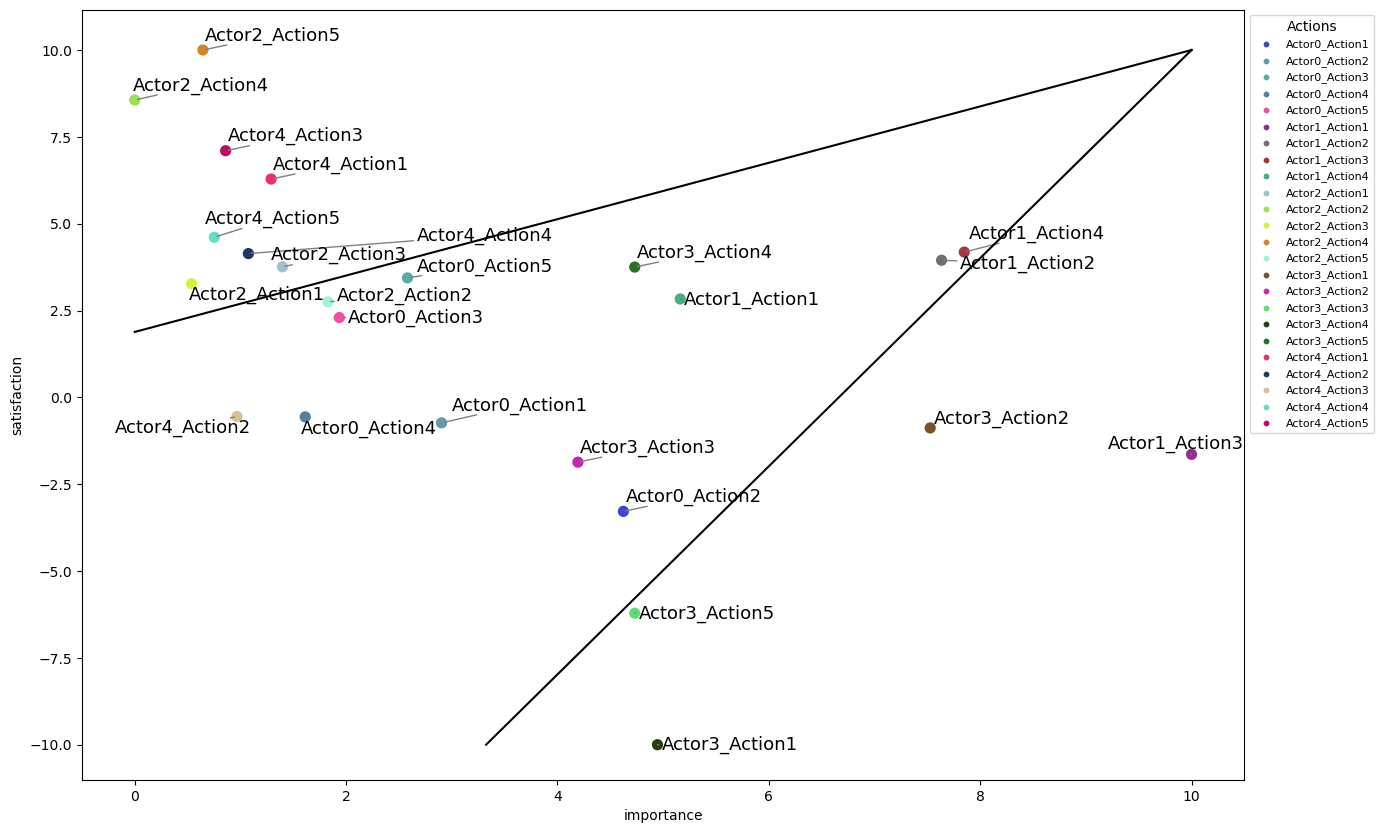

In [67]:
plt.figure(figsize=(15,10))
plt.scatter(importance, satisfaction, s=50, c=color)#s:점 사이즈, c:색상
plt.xlabel("importance")
plt.ylabel("satisfaction")

#중요도 기준선
ydata=[-10,10] # 좌표 찍어주는거
xdata=[importance.mean(), 10]
plt.plot(xdata, ydata, 'k')

#만족도 기준선
xdata=[0,10]
ydata=[satisfaction.mean(),10]
plt.plot(xdata, ydata, 'k')

#점에 이름 붙이기 + 위치조정
texts=[]
for i, action in enumerate(actions):
    texts.append(plt.text(importance[i], satisfaction[i], action, fontsize=13))

# 위치조정
adjust_text(texts, arrowprops = dict(arrowstyle='-', color='grey', lw=1)) #lw는 선 두께

#색상 범례추가
for i, action in enumerate(actions):
    plt.scatter([], [], c=[color[i]], label=action, s=10)
 
plt.legend(title = 'Actions', fontsize=8, title_fontsize='10', loc='upper left', bbox_to_anchor=(1,1))
plt.show()